In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import utils
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from importlib import reload
import base
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers
import cvae_tfp
reload(cvae_tfp)
tf.keras.backend.set_floatx('float32')

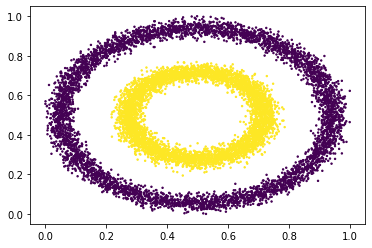

In [7]:
data, conditions = make_circles(n_samples=10000, noise=0.05, factor=0.5)
data = np.float32(data)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
# Plot dataset
plt.scatter(*data.T, c=conditions, s=2)
plt.show()
data = utils.as_float_array(data)
data_cond = utils.as_float_array(conditions)
data_cond = data_cond.reshape(-1, 1)

## Normal 

In [8]:
model2 = cvae_tfp.CVAE_circle(data.shape[-1], data_cond.shape[-1], encoder =cvae_tfp.EncoderNormal)
def zero_error(y_true, y_pred):
    return tf.constant(0., dtype='float32')
model2.compile(optimizer='adam', loss=zero_error)
model2.evaluate(x = [data, data_cond], y = np.zeros(shape= (data.shape[0],1)))
model2.fit(x = [data, data_cond], y = np.zeros(shape= (data.shape[0],1)), epochs=5000,\
                 batch_size=data.shape[0], verbose = True)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.1403
Train on 10000 samples
Epoch 1/5000
10000/10000 [==============================] - 1s 93us/sample - loss: 0.1401
Epoch 2/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1386
Epoch 3/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1373
Epoch 4/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1365
Epoch 5/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1349
Epoch 6/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1334
Epoch 7/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1328
Epoch 8/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1324
Epoch 9/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1303
Epoch 10/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1296
Epoch 11

Epoch 89/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1211
Epoch 90/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1210
Epoch 91/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1208
Epoch 92/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1207
Epoch 93/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1209
Epoch 94/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1207
Epoch 95/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1207
Epoch 96/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1203
Epoch 97/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1207
Epoch 98/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1207
Epoch 99/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1206
Epoch 100/

Epoch 180/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1039
Epoch 181/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1039
Epoch 182/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1034
Epoch 183/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1032
Epoch 184/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1028
Epoch 185/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1027
Epoch 186/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1023
Epoch 187/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1018
Epoch 188/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1023
Epoch 189/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1025
Epoch 190/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1011

Epoch 271/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0752
Epoch 272/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0751
Epoch 273/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0746
Epoch 274/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0752
Epoch 275/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0744
Epoch 276/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0740
Epoch 277/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0739
Epoch 278/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0731
Epoch 279/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0730
Epoch 280/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0726
Epoch 281/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0725

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0649
Epoch 362/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0644
Epoch 363/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0646
Epoch 364/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0643
Epoch 365/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0647
Epoch 366/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0642
Epoch 367/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0644
Epoch 368/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0641
Epoch 369/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0640
Epoch 370/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0642
Epoch 371/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0641
Epoch 372/5000

Epoch 452/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0604
Epoch 453/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0604
Epoch 454/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0604
Epoch 455/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0601
Epoch 456/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0603
Epoch 457/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0601
Epoch 458/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0602
Epoch 459/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0601
Epoch 460/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0598
Epoch 461/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0600
Epoch 462/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0601

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0577
Epoch 543/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0573
Epoch 544/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0577
Epoch 545/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0573
Epoch 546/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0573
Epoch 547/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0571
Epoch 548/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0576
Epoch 549/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0575
Epoch 550/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0573
Epoch 551/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0571
Epoch 552/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0571
Epoch 553/5000

Epoch 633/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0550
Epoch 634/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0548
Epoch 635/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0550
Epoch 636/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0547
Epoch 637/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0550
Epoch 638/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0548
Epoch 639/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0551
Epoch 640/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0549
Epoch 641/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0549
Epoch 642/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0551
Epoch 643/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0548

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0531
Epoch 724/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0532
Epoch 725/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0532
Epoch 726/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0532
Epoch 727/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0529
Epoch 728/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0533
Epoch 729/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0531
Epoch 730/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0532
Epoch 731/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0530
Epoch 732/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0532
Epoch 733/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0532
Epoch 734/5000

Epoch 814/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0520
Epoch 815/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0518
Epoch 816/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0520
Epoch 817/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0519
Epoch 818/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0519
Epoch 819/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0520
Epoch 820/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0520
Epoch 821/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0519
Epoch 822/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0517
Epoch 823/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0519
Epoch 824/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0520

Epoch 905/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0511
Epoch 906/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0509
Epoch 907/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0511
Epoch 908/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0511
Epoch 909/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0508
Epoch 910/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0509
Epoch 911/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0512
Epoch 912/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0510
Epoch 913/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0511
Epoch 914/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0509
Epoch 915/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0508

Epoch 996/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0504
Epoch 997/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0504
Epoch 998/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0505
Epoch 999/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0503
Epoch 1000/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0506
Epoch 1001/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0503
Epoch 1002/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0505
Epoch 1003/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0505
Epoch 1004/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0503
Epoch 1005/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0504
Epoch 1006/5000
10000/10000 [==============================] - 0s 1us/sample - loss:

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0499
Epoch 1086/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0496
Epoch 1087/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0495
Epoch 1088/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0499
Epoch 1089/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0499
Epoch 1090/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0498
Epoch 1091/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0499
Epoch 1092/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0498
Epoch 1093/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0497
Epoch 1094/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0496
Epoch 1095/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0498
Epoc

Epoch 1175/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0493
Epoch 1176/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0496
Epoch 1177/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0494
Epoch 1178/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0494
Epoch 1179/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0493
Epoch 1180/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0496
Epoch 1181/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0494
Epoch 1182/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0494
Epoch 1183/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0494
Epoch 1184/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0492
Epoch 1185/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0491
Epoch 1265/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0491
Epoch 1266/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0490
Epoch 1267/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0488
Epoch 1268/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0490
Epoch 1269/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0491
Epoch 1270/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0489
Epoch 1271/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0489
Epoch 1272/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0489
Epoch 1273/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0490
Epoch 1274/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0490
Epoc

Epoch 1354/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0488
Epoch 1355/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0487
Epoch 1356/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0487
Epoch 1357/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0487
Epoch 1358/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0487
Epoch 1359/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0487
Epoch 1360/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0486
Epoch 1361/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0488
Epoch 1362/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0488
Epoch 1363/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0486
Epoch 1364/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0482
Epoch 1444/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0483
Epoch 1445/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0483
Epoch 1446/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0485
Epoch 1447/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0486
Epoch 1448/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0484
Epoch 1449/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0484
Epoch 1450/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0483
Epoch 1451/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0486
Epoch 1452/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0485
Epoch 1453/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0485
Epoc

Epoch 1533/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0481
Epoch 1534/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0483
Epoch 1535/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0481
Epoch 1536/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0482
Epoch 1537/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0480
Epoch 1538/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0480
Epoch 1539/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0483
Epoch 1540/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0482
Epoch 1541/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0484
Epoch 1542/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0481
Epoch 1543/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0479
Epoch 1623/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0480
Epoch 1624/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0479
Epoch 1625/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0480
Epoch 1626/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0477
Epoch 1627/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0477
Epoch 1628/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0481
Epoch 1629/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0478
Epoch 1630/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0480
Epoch 1631/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0479
Epoch 1632/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0481
Epoc

Epoch 1712/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0477
Epoch 1713/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0476
Epoch 1714/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0479
Epoch 1715/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0476
Epoch 1716/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0479
Epoch 1717/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0477
Epoch 1718/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0479
Epoch 1719/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0477
Epoch 1720/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0479
Epoch 1721/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0478
Epoch 1722/5000
10000/10000 [==============================] - 0s 1us/sample - l

Epoch 1802/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0477
Epoch 1803/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0476
Epoch 1804/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0477
Epoch 1805/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0476
Epoch 1806/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0475
Epoch 1807/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0477
Epoch 1808/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0475
Epoch 1809/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0476
Epoch 1810/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0476
Epoch 1811/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0477
Epoch 1812/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0475
Epoch 1892/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0475
Epoch 1893/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0472
Epoch 1894/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0476
Epoch 1895/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0474
Epoch 1896/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0477
Epoch 1897/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0475
Epoch 1898/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0475
Epoch 1899/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0476
Epoch 1900/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0473
Epoch 1901/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0475
Epoc

Epoch 1981/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0474
Epoch 1982/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0476
Epoch 1983/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0475
Epoch 1984/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0473
Epoch 1985/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0474
Epoch 1986/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0475
Epoch 1987/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0475
Epoch 1988/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0473
Epoch 1989/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0475
Epoch 1990/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0475
Epoch 1991/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0474
Epoch 2071/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0475
Epoch 2072/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0473
Epoch 2073/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0473
Epoch 2074/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0472
Epoch 2075/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0475
Epoch 2076/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0473
Epoch 2077/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0473
Epoch 2078/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0473
Epoch 2079/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0473
Epoch 2080/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0474
Epoc

Epoch 2160/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0471
Epoch 2161/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2162/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0473
Epoch 2163/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0472
Epoch 2164/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2165/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0472
Epoch 2166/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0474
Epoch 2167/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0472
Epoch 2168/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2169/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0472
Epoch 2170/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0471
Epoch 2250/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0471
Epoch 2251/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0471
Epoch 2252/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0471
Epoch 2253/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0472
Epoch 2254/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2255/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2256/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0471
Epoch 2257/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2258/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2259/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0472
Epoc

Epoch 2339/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0471
Epoch 2340/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 2341/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2342/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0471
Epoch 2343/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0472
Epoch 2344/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0471
Epoch 2345/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2346/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0471
Epoch 2347/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0471
Epoch 2348/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2349/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0472
Epoch 2429/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2430/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0471
Epoch 2431/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2432/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2433/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2434/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2435/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0471
Epoch 2436/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2437/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2438/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoc

Epoch 2518/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2519/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2520/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2521/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2522/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2523/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2524/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2525/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2526/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2527/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2528/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2608/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2609/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2610/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2611/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2612/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2613/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2614/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2615/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2616/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2617/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoc

Epoch 2697/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2698/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2699/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2700/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 2701/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 2702/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2703/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0470
Epoch 2704/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 2705/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2706/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2707/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 2787/5000
10000/10000 [==============================] - 0s 0s/sample - loss: 0.0468
Epoch 2788/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 2789/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2790/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2791/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2792/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2793/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 2794/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2795/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 2796/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch

Epoch 2876/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 2877/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2878/5000
10000/10000 [==============================] - 0s 0s/sample - loss: 0.0466
Epoch 2879/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 2880/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 2881/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0465
Epoch 2882/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2883/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 2884/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2885/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 2886/5000
10000/10000 [==============================] - 0s 1us/sample - lo

Epoch 2966/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 2967/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 2968/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2969/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2970/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2971/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 2972/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 2973/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 2974/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 2975/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 2976/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3056/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3057/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3058/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3059/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 3060/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 3061/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3062/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 3063/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3064/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3065/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoc

Epoch 3145/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3146/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3147/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 3148/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3149/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3150/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3151/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 3152/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 3153/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 3154/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3155/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3235/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3236/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3237/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3238/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3239/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3240/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 3241/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 3242/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3243/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3244/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoc

Epoch 3324/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3325/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 3326/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3327/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3328/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3329/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3330/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 3331/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3332/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3333/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0465
Epoch 3334/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0468
Epoch 3414/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3415/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3416/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 3417/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3418/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0469
Epoch 3419/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3420/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3421/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3422/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3423/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoc

Epoch 3503/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3504/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0464
Epoch 3505/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3506/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3507/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 3508/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3509/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3510/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3511/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3512/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3513/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3593/5000
10000/10000 [==============================] - 0s 0s/sample - loss: 0.0464
Epoch 3594/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3595/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3596/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3597/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3598/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 3599/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3600/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3601/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3602/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch

Epoch 3682/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 3683/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3684/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3685/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3686/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3687/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3688/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 3689/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 3690/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3691/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3692/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3772/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0464
Epoch 3773/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3774/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3775/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 3776/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 3777/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 3778/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 3779/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3780/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3781/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoc

Epoch 3861/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3862/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3863/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 3864/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3865/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 3866/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3867/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3868/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 3869/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3870/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 3871/5000
10000/10000 [==============================] - 0s 1us/sample - l

Epoch 3951/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 3952/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3953/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3954/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3955/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 3956/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0467
Epoch 3957/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3958/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 3959/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0465
Epoch 3960/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 3961/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 4041/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0462
Epoch 4042/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4043/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0462
Epoch 4044/5000
10000/10000 [==============================] - 0s 0s/sample - loss: 0.0464
Epoch 4045/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4046/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 4047/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4048/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4049/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4050/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch

Epoch 4130/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4131/5000
10000/10000 [==============================] - 0s 0us/sample - loss: 0.0463
Epoch 4132/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4133/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 4134/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4135/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4136/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 4137/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 4138/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4139/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4140/5000
10000/10000 [==============================] - 0s 1us/sample - l

Epoch 4220/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0462
Epoch 4221/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 4222/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 4223/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4224/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 4225/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4226/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4227/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4228/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 4229/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0461
Epoch 4230/5000
10000/10000 [==============================] - 0s 1us/sample - l

Epoch 4310/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4311/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4312/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0461
Epoch 4313/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 4314/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0462
Epoch 4315/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4316/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4317/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4318/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4319/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4320/5000
10000/10000 [==============================] - 0s 1us/sample - l

Epoch 4400/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4401/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4402/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4403/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0462
Epoch 4404/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4405/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4406/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4407/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4408/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 4409/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4410/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4490/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0466
Epoch 4491/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 4492/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4493/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0462
Epoch 4494/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0461
Epoch 4495/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4496/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4497/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4498/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4499/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoc

Epoch 4579/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0462
Epoch 4580/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4581/5000
10000/10000 [==============================] - 0s 0s/sample - loss: 0.0462
Epoch 4582/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0462
Epoch 4583/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 4584/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4585/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4586/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4587/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4588/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4589/5000
10000/10000 [==============================] - 0s 1us/sample - lo

Epoch 4669/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4670/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4671/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4672/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4673/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4674/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4675/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4676/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4677/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4678/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 4679/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0462
Epoch 4759/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4760/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0462
Epoch 4761/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4762/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4763/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0461
Epoch 4764/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4765/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4766/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0465
Epoch 4767/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0461
Epoch 4768/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0462
Epoc

Epoch 4848/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4849/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4850/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4851/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0459
Epoch 4852/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4853/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0460
Epoch 4854/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4855/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0461
Epoch 4856/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4857/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4858/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0462
Epoch 4938/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0462
Epoch 4939/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0462
Epoch 4940/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0460
Epoch 4941/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0462
Epoch 4942/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoch 4943/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4944/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0461
Epoch 4945/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0464
Epoch 4946/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0462
Epoch 4947/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0463
Epoc


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



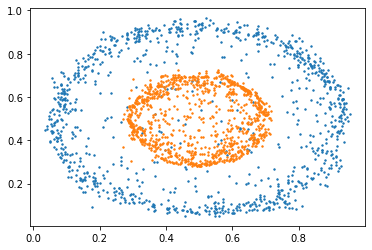

(None,
 ListWrapper([<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[0., 0.]], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.]], dtype=float32)>]))

In [9]:
model2.visualize(), model2.df_input

## Student 

In [10]:
model = cvae_tfp.CVAE_circle(data.shape[-1], data_cond.shape[-1], encoder =cvae_tfp.EncoderStudent)
def zero_error(y_true, y_pred):
    return tf.constant(0., dtype='float32')
model.compile(optimizer='adam', loss=zero_error)
model.evaluate(x = [data, data_cond], y = np.zeros(shape= (data.shape[0],1)))
model.fit(x = [data, data_cond], y = np.zeros(shape= (data.shape[0],1)), epochs=5000,\
                 batch_size=data.shape[0], verbose = True)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: expected exactly one node node, found [<gast.gast.FunctionDef object at 0x000001FF5F81CBA8>, <gast.gast.Return object at 0x000001FF5F81CBE0>]
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: expected exactly one node node, found [<gast.gast.FunctionDef object at 0x000001FF5F81CBA8>, <gast.gast.Return object at 0x000001FF5F81CBE0>]
10000/10000 [==============================] - 1s 50us/sample - loss: 0.2752
Train on 10000 samples
Epoch 1/5000
10000/10000 [==============================] - 1s 110us/sample - loss: 0.2778
Epoch 2/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.2706
Epoch 3/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.2709
Epoch 4/5000


Epoch 79/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1279
Epoch 80/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1292
Epoch 81/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1272
Epoch 82/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1278
Epoch 83/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1276
Epoch 84/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1288
Epoch 85/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1285
Epoch 86/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1284
Epoch 87/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1280
Epoch 88/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1270
Epoch 89/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1274
Epoch 90/5

Epoch 170/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1266
Epoch 171/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1266
Epoch 172/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1268
Epoch 173/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1267
Epoch 174/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1274
Epoch 175/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1269
Epoch 176/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1265
Epoch 177/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1256
Epoch 178/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1264
Epoch 179/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1261
Epoch 180/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1266

10000/10000 [==============================] - 0s 2us/sample - loss: 0.1249
Epoch 261/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1254
Epoch 262/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1252
Epoch 263/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1250
Epoch 264/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1252
Epoch 265/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1250
Epoch 266/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1248
Epoch 267/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1251
Epoch 268/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1254
Epoch 269/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1252
Epoch 270/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1256
Epoch 271/5000

Epoch 351/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1255
Epoch 352/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1251
Epoch 353/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1257
Epoch 354/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1259
Epoch 355/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1262
Epoch 356/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1258
Epoch 357/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1252
Epoch 358/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1251
Epoch 359/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1258
Epoch 360/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1253
Epoch 361/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1252

10000/10000 [==============================] - 0s 2us/sample - loss: 0.1242
Epoch 442/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1241
Epoch 443/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1238
Epoch 444/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1242
Epoch 445/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1236
Epoch 446/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1245
Epoch 447/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1237
Epoch 448/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1239
Epoch 449/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1242
Epoch 450/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1240
Epoch 451/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1238
Epoch 452/5000

Epoch 532/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1233
Epoch 533/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1230
Epoch 534/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1230
Epoch 535/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1231
Epoch 536/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1238
Epoch 537/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1231
Epoch 538/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1232
Epoch 539/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1230
Epoch 540/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1226
Epoch 541/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1224
Epoch 542/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1229

10000/10000 [==============================] - 0s 2us/sample - loss: 0.1224
Epoch 623/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1230
Epoch 624/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1222
Epoch 625/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1220
Epoch 626/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1217
Epoch 627/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1221
Epoch 628/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1221
Epoch 629/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1220
Epoch 630/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1225
Epoch 631/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1221
Epoch 632/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1219
Epoch 633/5000

Epoch 713/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1199
Epoch 714/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1193
Epoch 715/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1196
Epoch 716/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1193
Epoch 717/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1197
Epoch 718/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1195
Epoch 719/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1197
Epoch 720/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1190
Epoch 721/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1193
Epoch 722/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1188
Epoch 723/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1189

10000/10000 [==============================] - 0s 1us/sample - loss: 0.1146
Epoch 804/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1145
Epoch 805/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1149
Epoch 806/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1156
Epoch 807/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1144
Epoch 808/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1143
Epoch 809/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1147
Epoch 810/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1139
Epoch 811/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1143
Epoch 812/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1144
Epoch 813/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1134
Epoch 814/5000

Epoch 894/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1084
Epoch 895/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1083
Epoch 896/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1079
Epoch 897/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1072
Epoch 898/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1078
Epoch 899/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1077
Epoch 900/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1074
Epoch 901/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1072
Epoch 902/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1077
Epoch 903/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1075
Epoch 904/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.1067

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0996
Epoch 985/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0981
Epoch 986/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0987
Epoch 987/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0989
Epoch 988/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0972
Epoch 989/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0976
Epoch 990/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0988
Epoch 991/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0978
Epoch 992/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0965
Epoch 993/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0979
Epoch 994/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0985
Epoch 995/5000

Epoch 1074/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0898
Epoch 1075/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0898
Epoch 1076/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0897
Epoch 1077/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0895
Epoch 1078/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0895
Epoch 1079/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0894
Epoch 1080/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0888
Epoch 1081/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0889
Epoch 1082/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0890
Epoch 1083/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0892
Epoch 1084/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0814
Epoch 1164/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0828
Epoch 1165/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0813
Epoch 1166/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0807
Epoch 1167/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0816
Epoch 1168/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0804
Epoch 1169/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0811
Epoch 1170/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0809
Epoch 1171/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0823
Epoch 1172/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0819
Epoch 1173/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0805
Epoc

Epoch 1253/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0770
Epoch 1254/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0767
Epoch 1255/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0766
Epoch 1256/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0768
Epoch 1257/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0772
Epoch 1258/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0773
Epoch 1259/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0769
Epoch 1260/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0767
Epoch 1261/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0772
Epoch 1262/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0785
Epoch 1263/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0744
Epoch 1343/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0748
Epoch 1344/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0742
Epoch 1345/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0744
Epoch 1346/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0747
Epoch 1347/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0746
Epoch 1348/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0739
Epoch 1349/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0743
Epoch 1350/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0740
Epoch 1351/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0747
Epoch 1352/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0745
Epoc

Epoch 1432/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0722
Epoch 1433/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0732
Epoch 1434/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0722
Epoch 1435/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0726
Epoch 1436/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0726
Epoch 1437/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0727
Epoch 1438/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0734
Epoch 1439/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0734
Epoch 1440/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0740
Epoch 1441/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0726
Epoch 1442/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0717
Epoch 1522/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0705
Epoch 1523/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0708
Epoch 1524/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0717
Epoch 1525/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0723
Epoch 1526/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0734
Epoch 1527/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0731
Epoch 1528/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0730
Epoch 1529/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0741
Epoch 1530/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0734
Epoch 1531/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0765
Epoc

Epoch 1611/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0703
Epoch 1612/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0706
Epoch 1613/5000
10000/10000 [==============================] - 0s 0us/sample - loss: 0.0707
Epoch 1614/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0702
Epoch 1615/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0712
Epoch 1616/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0705
Epoch 1617/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0712
Epoch 1618/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0709
Epoch 1619/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0708
Epoch 1620/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0699
Epoch 1621/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0688
Epoch 1701/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0683
Epoch 1702/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0687
Epoch 1703/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0686
Epoch 1704/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0679
Epoch 1705/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0684
Epoch 1706/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0687
Epoch 1707/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0682
Epoch 1708/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0693
Epoch 1709/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0687
Epoch 1710/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0693
Epoc

Epoch 1790/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0673
Epoch 1791/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0670
Epoch 1792/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0672
Epoch 1793/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0682
Epoch 1794/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0677
Epoch 1795/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0674
Epoch 1796/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0675
Epoch 1797/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0673
Epoch 1798/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0678
Epoch 1799/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0680
Epoch 1800/5000
10000/10000 [==============================] - 0s 2us/sample - l

Epoch 1880/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0673
Epoch 1881/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0668
Epoch 1882/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0666
Epoch 1883/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0664
Epoch 1884/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0660
Epoch 1885/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0660
Epoch 1886/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0663
Epoch 1887/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0661
Epoch 1888/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0662
Epoch 1889/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0667
Epoch 1890/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0665
Epoch 1970/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0658
Epoch 1971/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0663
Epoch 1972/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0655
Epoch 1973/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0654
Epoch 1974/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0654
Epoch 1975/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0656
Epoch 1976/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0662
Epoch 1977/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0660
Epoch 1978/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0655
Epoch 1979/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0656
Epoc

Epoch 2059/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0649
Epoch 2060/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0643
Epoch 2061/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0657
Epoch 2062/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0648
Epoch 2063/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0649
Epoch 2064/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0653
Epoch 2065/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0649
Epoch 2066/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0656
Epoch 2067/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0644
Epoch 2068/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0640
Epoch 2069/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0643
Epoch 2149/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0638
Epoch 2150/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0644
Epoch 2151/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0638
Epoch 2152/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0647
Epoch 2153/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0638
Epoch 2154/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0646
Epoch 2155/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0637
Epoch 2156/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0639
Epoch 2157/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0647
Epoch 2158/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0643
Epoc

Epoch 2238/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0632
Epoch 2239/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0632
Epoch 2240/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0628
Epoch 2241/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0631
Epoch 2242/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0634
Epoch 2243/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0628
Epoch 2244/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0634
Epoch 2245/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0633
Epoch 2246/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0631
Epoch 2247/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0622
Epoch 2248/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0624
Epoch 2328/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0618
Epoch 2329/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0618
Epoch 2330/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0620
Epoch 2331/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0632
Epoch 2332/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0618
Epoch 2333/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0620
Epoch 2334/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0625
Epoch 2335/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0622
Epoch 2336/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0621
Epoch 2337/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0623
Epoc

Epoch 2417/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0611
Epoch 2418/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0614
Epoch 2419/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0612
Epoch 2420/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0612
Epoch 2421/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0617
Epoch 2422/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0615
Epoch 2423/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0621
Epoch 2424/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0602
Epoch 2425/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0616
Epoch 2426/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0607
Epoch 2427/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0608
Epoch 2507/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0610
Epoch 2508/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0601
Epoch 2509/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0600
Epoch 2510/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0599
Epoch 2511/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0606
Epoch 2512/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0612
Epoch 2513/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0604
Epoch 2514/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0609
Epoch 2515/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0604
Epoch 2516/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0601
Epoc

Epoch 2596/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0592
Epoch 2597/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0605
Epoch 2598/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0605
Epoch 2599/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0594
Epoch 2600/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0601
Epoch 2601/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0601
Epoch 2602/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0604
Epoch 2603/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0594
Epoch 2604/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0597
Epoch 2605/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0596
Epoch 2606/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0589
Epoch 2686/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0593
Epoch 2687/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0597
Epoch 2688/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0590
Epoch 2689/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0594
Epoch 2690/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0589
Epoch 2691/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0595
Epoch 2692/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0588
Epoch 2693/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0589
Epoch 2694/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0591
Epoch 2695/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0584
Epoc

Epoch 2775/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0590
Epoch 2776/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0588
Epoch 2777/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0589
Epoch 2778/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0590
Epoch 2779/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0588
Epoch 2780/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0584
Epoch 2781/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0585
Epoch 2782/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0583
Epoch 2783/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0584
Epoch 2784/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0579
Epoch 2785/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0579
Epoch 2865/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0580
Epoch 2866/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0576
Epoch 2867/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0575
Epoch 2868/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0577
Epoch 2869/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0583
Epoch 2870/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0581
Epoch 2871/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0578
Epoch 2872/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0585
Epoch 2873/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0579
Epoch 2874/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0580
Epoc

Epoch 2954/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0578
Epoch 2955/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0577
Epoch 2956/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0570
Epoch 2957/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0573
Epoch 2958/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0572
Epoch 2959/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0569
Epoch 2960/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0571
Epoch 2961/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0564
Epoch 2962/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0572
Epoch 2963/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0569
Epoch 2964/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0565
Epoch 3044/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0568
Epoch 3045/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0565
Epoch 3046/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0565
Epoch 3047/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0568
Epoch 3048/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0563
Epoch 3049/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0567
Epoch 3050/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0570
Epoch 3051/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0570
Epoch 3052/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0563
Epoch 3053/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0564
Epoc

Epoch 3133/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0558
Epoch 3134/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0561
Epoch 3135/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0562
Epoch 3136/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0559
Epoch 3137/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0565
Epoch 3138/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0563
Epoch 3139/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0559
Epoch 3140/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0564
Epoch 3141/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0566
Epoch 3142/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0563
Epoch 3143/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0555
Epoch 3223/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0557
Epoch 3224/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0553
Epoch 3225/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0561
Epoch 3226/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0558
Epoch 3227/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0555
Epoch 3228/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0553
Epoch 3229/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0557
Epoch 3230/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0556
Epoch 3231/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0557
Epoch 3232/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0558
Epoc

Epoch 3312/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0552
Epoch 3313/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0549
Epoch 3314/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0550
Epoch 3315/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0549
Epoch 3316/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0553
Epoch 3317/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0550
Epoch 3318/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0555
Epoch 3319/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0556
Epoch 3320/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0555
Epoch 3321/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0551
Epoch 3322/5000
10000/10000 [==============================] - 0s 1us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0546
Epoch 3402/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0552
Epoch 3403/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0548
Epoch 3404/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0546
Epoch 3405/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0550
Epoch 3406/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0549
Epoch 3407/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0549
Epoch 3408/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0550
Epoch 3409/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0548
Epoch 3410/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0549
Epoch 3411/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0551
Epoc

Epoch 3491/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0541
Epoch 3492/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0547
Epoch 3493/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0549
Epoch 3494/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0545
Epoch 3495/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0549
Epoch 3496/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0540
Epoch 3497/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0547
Epoch 3498/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0543
Epoch 3499/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0542
Epoch 3500/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0542
Epoch 3501/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 1us/sample - loss: 0.0539
Epoch 3581/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0538
Epoch 3582/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0539
Epoch 3583/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0538
Epoch 3584/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0544
Epoch 3585/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0542
Epoch 3586/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0535
Epoch 3587/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0549
Epoch 3588/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0538
Epoch 3589/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0541
Epoch 3590/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0545
Epoc

Epoch 3670/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0537
Epoch 3671/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0543
Epoch 3672/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0537
Epoch 3673/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0536
Epoch 3674/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0537
Epoch 3675/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0541
Epoch 3676/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0539
Epoch 3677/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0536
Epoch 3678/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0540
Epoch 3679/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0537
Epoch 3680/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0535
Epoch 3760/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0534
Epoch 3761/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0533
Epoch 3762/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0535
Epoch 3763/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0535
Epoch 3764/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0534
Epoch 3765/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0532
Epoch 3766/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0535
Epoch 3767/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0534
Epoch 3768/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0531
Epoch 3769/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0534
Epoc

Epoch 3849/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0531
Epoch 3850/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0530
Epoch 3851/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0532
Epoch 3852/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0533
Epoch 3853/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0530
Epoch 3854/5000
10000/10000 [==============================] - 0s 4us/sample - loss: 0.0532
Epoch 3855/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0532
Epoch 3856/5000
10000/10000 [==============================] - 0s 4us/sample - loss: 0.0529
Epoch 3857/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0533
Epoch 3858/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0530
Epoch 3859/5000
10000/10000 [==============================] - 0s 3us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0530
Epoch 3939/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0528
Epoch 3940/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0525
Epoch 3941/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0527
Epoch 3942/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0531
Epoch 3943/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0531
Epoch 3944/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0528
Epoch 3945/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0531
Epoch 3946/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0528
Epoch 3947/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0528
Epoch 3948/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0528
Epoc

Epoch 4028/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0523
Epoch 4029/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0524
Epoch 4030/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0524
Epoch 4031/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0528
Epoch 4032/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0525
Epoch 4033/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0526
Epoch 4034/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0526
Epoch 4035/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0521
Epoch 4036/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0521
Epoch 4037/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0525
Epoch 4038/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0527
Epoch 4118/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0520
Epoch 4119/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0521
Epoch 4120/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0526
Epoch 4121/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0527
Epoch 4122/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0525
Epoch 4123/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0523
Epoch 4124/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0523
Epoch 4125/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0523
Epoch 4126/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0525
Epoch 4127/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0522
Epoc

Epoch 4207/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0522
Epoch 4208/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0520
Epoch 4209/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0516
Epoch 4210/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0522
Epoch 4211/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0526
Epoch 4212/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0522
Epoch 4213/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0520
Epoch 4214/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0520
Epoch 4215/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0519
Epoch 4216/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0524
Epoch 4217/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0522
Epoch 4297/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0518
Epoch 4298/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0520
Epoch 4299/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0514
Epoch 4300/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0518
Epoch 4301/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0524
Epoch 4302/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0518
Epoch 4303/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0519
Epoch 4304/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0521
Epoch 4305/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0516
Epoch 4306/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0519
Epoc

Epoch 4386/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0514
Epoch 4387/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0512
Epoch 4388/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0514
Epoch 4389/5000
10000/10000 [==============================] - 0s 4us/sample - loss: 0.0519
Epoch 4390/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0518
Epoch 4391/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0514
Epoch 4392/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0511
Epoch 4393/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0521
Epoch 4394/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0518
Epoch 4395/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0514
Epoch 4396/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0512
Epoch 4476/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0517
Epoch 4477/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0513
Epoch 4478/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0515
Epoch 4479/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0512
Epoch 4480/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0514
Epoch 4481/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0517
Epoch 4482/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0516
Epoch 4483/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0515
Epoch 4484/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0515
Epoch 4485/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0512
Epoc

Epoch 4565/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0512
Epoch 4566/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0516
Epoch 4567/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0514
Epoch 4568/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0513
Epoch 4569/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0513
Epoch 4570/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0511
Epoch 4571/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0513
Epoch 4572/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0513
Epoch 4573/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0511
Epoch 4574/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0514
Epoch 4575/5000
10000/10000 [==============================] - 0s 2us/sample - l

Epoch 4655/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0509
Epoch 4656/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0509
Epoch 4657/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0510
Epoch 4658/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0509
Epoch 4659/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0514
Epoch 4660/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0513
Epoch 4661/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0506
Epoch 4662/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0510
Epoch 4663/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0512
Epoch 4664/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0509
Epoch 4665/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0507
Epoch 4745/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0506
Epoch 4746/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0509
Epoch 4747/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0505
Epoch 4748/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0508
Epoch 4749/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0510
Epoch 4750/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0509
Epoch 4751/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0507
Epoch 4752/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0506
Epoch 4753/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0509
Epoch 4754/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0507
Epoc

Epoch 4834/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0506
Epoch 4835/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0505
Epoch 4836/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0507
Epoch 4837/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0507
Epoch 4838/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0504
Epoch 4839/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0504
Epoch 4840/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0507
Epoch 4841/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0503
Epoch 4842/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0508
Epoch 4843/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0506
Epoch 4844/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0506
Epoch 4924/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0507
Epoch 4925/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0507
Epoch 4926/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0504
Epoch 4927/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0508
Epoch 4928/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0506
Epoch 4929/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0504
Epoch 4930/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0507
Epoch 4931/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0506
Epoch 4932/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0503
Epoch 4933/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0503
Epoc


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



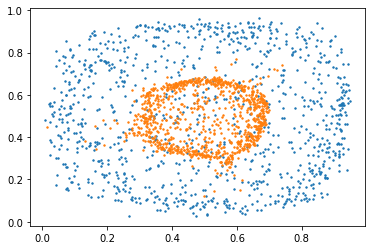

(None,
 ListWrapper([<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[0., 0.]], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.0602117]], dtype=float32)>]),
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([4.6186657, 4.6186657, 4.6186657, 4.6186657], dtype=float32)>)

In [11]:
model.visualize(), model.df_input, model.encoder.df

## Student + pseudo input

In [12]:
model = cvae_tfp.CVAE_circle(data.shape[-1], data_cond.shape[-1], encoder =cvae_tfp.EncoderStudentPseudo)
def zero_error(y_true, y_pred):
    return tf.constant(0., dtype='float32')
model.compile(optimizer='adam', loss=zero_error)
model.evaluate(x = [data, data_cond], y = np.zeros(shape= (data.shape[0],1)))
model.fit(x = [data, data_cond], y = np.zeros(shape= (data.shape[0],1)), epochs=5000,\
                 batch_size=data.shape[0], verbose = True)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: expected exactly one node node, found [<gast.gast.FunctionDef object at 0x000001FF61377A20>, <gast.gast.Return object at 0x000001FF61377A58>]
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: expected exactly one node node, found [<gast.gast.FunctionDef object at 0x000001FF61377A20>, <gast.gast.Return object at 0x000001FF61377A58>]
10000/10000 [==============================] - 0s 48us/sample - loss: 0.2225
Train on 10000 samples
Epoch 1/5000
10000/10000 [==============================] - 1s 94us/sample - loss: 0.2286
Epoch 2/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.2198
Epoch 3/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.2169
Epoch 4/5000
1

Epoch 81/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1278
Epoch 82/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1291
Epoch 83/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1274
Epoch 84/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1276
Epoch 85/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1270
Epoch 86/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1268
Epoch 87/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1276
Epoch 88/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1267
Epoch 89/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1271
Epoch 90/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1267
Epoch 91/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1271
Epoch 92/5

Epoch 172/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1236
Epoch 173/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1235
Epoch 174/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1239
Epoch 175/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1235
Epoch 176/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1234
Epoch 177/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1237
Epoch 178/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1233
Epoch 179/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1240
Epoch 180/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1236
Epoch 181/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1237
Epoch 182/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1235

10000/10000 [==============================] - 0s 2us/sample - loss: 0.1226
Epoch 263/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1228
Epoch 264/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1226
Epoch 265/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1228
Epoch 266/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1227
Epoch 267/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1227
Epoch 268/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1225
Epoch 269/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1228
Epoch 270/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1228
Epoch 271/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1228
Epoch 272/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1227
Epoch 273/5000

Epoch 353/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1224
Epoch 354/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.1220
Epoch 355/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1223
Epoch 356/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1220
Epoch 357/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1225
Epoch 358/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.1221
Epoch 359/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1222
Epoch 360/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1221
Epoch 361/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1221
Epoch 362/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1222
Epoch 363/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1219

10000/10000 [==============================] - 0s 2us/sample - loss: 0.1197
Epoch 444/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1197
Epoch 445/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1186
Epoch 446/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1192
Epoch 447/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1188
Epoch 448/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1187
Epoch 449/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1184
Epoch 450/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1186
Epoch 451/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1178
Epoch 452/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1183
Epoch 453/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.1182
Epoch 454/5000

Epoch 534/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0824
Epoch 535/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0820
Epoch 536/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0812
Epoch 537/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0812
Epoch 538/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0810
Epoch 539/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0806
Epoch 540/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0797
Epoch 541/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0791
Epoch 542/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0791
Epoch 543/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0794
Epoch 544/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0787

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0665
Epoch 625/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0664
Epoch 626/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0667
Epoch 627/5000
10000/10000 [==============================] - 0s 0us/sample - loss: 0.0666
Epoch 628/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0668
Epoch 629/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0660
Epoch 630/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0666
Epoch 631/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0660
Epoch 632/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0661
Epoch 633/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0662
Epoch 634/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0656
Epoch 635/5000

Epoch 715/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0626
Epoch 716/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0627
Epoch 717/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0626
Epoch 718/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0628
Epoch 719/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0629
Epoch 720/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0625
Epoch 721/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0627
Epoch 722/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0623
Epoch 723/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0625
Epoch 724/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0621
Epoch 725/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0621

10000/10000 [==============================] - 0s 3us/sample - loss: 0.0603
Epoch 806/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0603
Epoch 807/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0602
Epoch 808/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0604
Epoch 809/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0603
Epoch 810/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0604
Epoch 811/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0602
Epoch 812/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0606
Epoch 813/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0602
Epoch 814/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0604
Epoch 815/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0603
Epoch 816/5000

Epoch 896/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0582
Epoch 897/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0584
Epoch 898/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0581
Epoch 899/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0581
Epoch 900/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0576
Epoch 901/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0579
Epoch 902/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0581
Epoch 903/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0581
Epoch 904/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0582
Epoch 905/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0578
Epoch 906/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0581

Epoch 987/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0565
Epoch 988/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0566
Epoch 989/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0565
Epoch 990/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0563
Epoch 991/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0566
Epoch 992/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0564
Epoch 993/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0564
Epoch 994/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0566
Epoch 995/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0560
Epoch 996/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0564
Epoch 997/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0564

Epoch 1077/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0551
Epoch 1078/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0550
Epoch 1079/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0548
Epoch 1080/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0551
Epoch 1081/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0550
Epoch 1082/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0549
Epoch 1083/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0552
Epoch 1084/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0547
Epoch 1085/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0551
Epoch 1086/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0549
Epoch 1087/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0537
Epoch 1167/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0541
Epoch 1168/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0540
Epoch 1169/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0541
Epoch 1170/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0538
Epoch 1171/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0538
Epoch 1172/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0538
Epoch 1173/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0537
Epoch 1174/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0538
Epoch 1175/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0539
Epoch 1176/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0540
Epoc

Epoch 1256/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0531
Epoch 1257/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0529
Epoch 1258/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0530
Epoch 1259/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0529
Epoch 1260/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0528
Epoch 1261/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0529
Epoch 1262/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0529
Epoch 1263/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0528
Epoch 1264/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0530
Epoch 1265/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0528
Epoch 1266/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0523
Epoch 1346/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0521
Epoch 1347/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0522
Epoch 1348/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0521
Epoch 1349/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0521
Epoch 1350/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0520
Epoch 1351/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0520
Epoch 1352/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0522
Epoch 1353/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0521
Epoch 1354/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0522
Epoch 1355/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0521
Epoc

Epoch 1435/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0516
Epoch 1436/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0514
Epoch 1437/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0516
Epoch 1438/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0514
Epoch 1439/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0516
Epoch 1440/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0515
Epoch 1441/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0516
Epoch 1442/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0513
Epoch 1443/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0514
Epoch 1444/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0516
Epoch 1445/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0511
Epoch 1525/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0513
Epoch 1526/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0509
Epoch 1527/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0511
Epoch 1528/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0511
Epoch 1529/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0511
Epoch 1530/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0511
Epoch 1531/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0512
Epoch 1532/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0512
Epoch 1533/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0511
Epoch 1534/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0509
Epoc

Epoch 1614/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0507
Epoch 1615/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0505
Epoch 1616/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0507
Epoch 1617/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0506
Epoch 1618/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0505
Epoch 1619/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0506
Epoch 1620/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0507
Epoch 1621/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0508
Epoch 1622/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0506
Epoch 1623/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0507
Epoch 1624/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0504
Epoch 1704/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0505
Epoch 1705/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0503
Epoch 1706/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0503
Epoch 1707/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0504
Epoch 1708/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0504
Epoch 1709/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0504
Epoch 1710/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0504
Epoch 1711/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0501
Epoch 1712/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0504
Epoch 1713/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0503
Epoc

Epoch 1793/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0501
Epoch 1794/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0501
Epoch 1795/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0501
Epoch 1796/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0501
Epoch 1797/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0500
Epoch 1798/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0502
Epoch 1799/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0501
Epoch 1800/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0501
Epoch 1801/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0500
Epoch 1802/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0500
Epoch 1803/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0498
Epoch 1883/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0498
Epoch 1884/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0500
Epoch 1885/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0499
Epoch 1886/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0498
Epoch 1887/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0499
Epoch 1888/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0498
Epoch 1889/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0499
Epoch 1890/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0500
Epoch 1891/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0498
Epoch 1892/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0499
Epoc

Epoch 1972/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0497
Epoch 1973/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0497
Epoch 1974/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0495
Epoch 1975/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0496
Epoch 1976/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0498
Epoch 1977/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0496
Epoch 1978/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0496
Epoch 1979/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0498
Epoch 1980/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0496
Epoch 1981/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0497
Epoch 1982/5000
10000/10000 [==============================] - 0s 3us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0495
Epoch 2062/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0494
Epoch 2063/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0494
Epoch 2064/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0494
Epoch 2065/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0496
Epoch 2066/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0493
Epoch 2067/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0495
Epoch 2068/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0495
Epoch 2069/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0495
Epoch 2070/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0494
Epoch 2071/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0495
Epoc

Epoch 2151/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0492
Epoch 2152/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0492
Epoch 2153/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0492
Epoch 2154/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0492
Epoch 2155/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0494
Epoch 2156/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0492
Epoch 2157/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0493
Epoch 2158/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0495
Epoch 2159/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0494
Epoch 2160/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0492
Epoch 2161/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0491
Epoch 2241/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0491
Epoch 2242/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0490
Epoch 2243/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0492
Epoch 2244/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0490
Epoch 2245/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0491
Epoch 2246/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0492
Epoch 2247/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0493
Epoch 2248/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0492
Epoch 2249/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0491
Epoch 2250/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0492
Epoc

Epoch 2330/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0489
Epoch 2331/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0489
Epoch 2332/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0490
Epoch 2333/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0489
Epoch 2334/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0489
Epoch 2335/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0491
Epoch 2336/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0488
Epoch 2337/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0490
Epoch 2338/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0490
Epoch 2339/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0490
Epoch 2340/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0489
Epoch 2420/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0487
Epoch 2421/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0489
Epoch 2422/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0489
Epoch 2423/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0488
Epoch 2424/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0489
Epoch 2425/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0488
Epoch 2426/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0489
Epoch 2427/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0487
Epoch 2428/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0489
Epoch 2429/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0489
Epoc

Epoch 2509/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0486
Epoch 2510/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0486
Epoch 2511/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0485
Epoch 2512/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0488
Epoch 2513/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0485
Epoch 2514/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0487
Epoch 2515/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0486
Epoch 2516/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0487
Epoch 2517/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0487
Epoch 2518/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0486
Epoch 2519/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0486
Epoch 2599/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0486
Epoch 2600/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0485
Epoch 2601/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0486
Epoch 2602/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0485
Epoch 2603/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0485
Epoch 2604/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0486
Epoch 2605/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0485
Epoch 2606/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0486
Epoch 2607/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0485
Epoch 2608/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0485
Epoc

Epoch 2688/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0485
Epoch 2689/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0484
Epoch 2690/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0485
Epoch 2691/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0484
Epoch 2692/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0483
Epoch 2693/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0484
Epoch 2694/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0484
Epoch 2695/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0483
Epoch 2696/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0484
Epoch 2697/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0483
Epoch 2698/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0483
Epoch 2778/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0483
Epoch 2779/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0483
Epoch 2780/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0481
Epoch 2781/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0483
Epoch 2782/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0483
Epoch 2783/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0483
Epoch 2784/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0483
Epoch 2785/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0483
Epoch 2786/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0482
Epoch 2787/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0482
Epoc

Epoch 2867/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0480
Epoch 2868/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0482
Epoch 2869/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0481
Epoch 2870/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0481
Epoch 2871/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0479
Epoch 2872/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0481
Epoch 2873/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0481
Epoch 2874/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0482
Epoch 2875/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0481
Epoch 2876/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0483
Epoch 2877/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0480
Epoch 2957/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0481
Epoch 2958/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0480
Epoch 2959/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0481
Epoch 2960/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0481
Epoch 2961/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0481
Epoch 2962/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0480
Epoch 2963/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0481
Epoch 2964/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0480
Epoch 2965/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0481
Epoch 2966/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0481
Epoc

Epoch 3046/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0479
Epoch 3047/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0480
Epoch 3048/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0478
Epoch 3049/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0478
Epoch 3050/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0479
Epoch 3051/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0481
Epoch 3052/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0480
Epoch 3053/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0479
Epoch 3054/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0479
Epoch 3055/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0480
Epoch 3056/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0477
Epoch 3136/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0479
Epoch 3137/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0480
Epoch 3138/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0479
Epoch 3139/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0479
Epoch 3140/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0477
Epoch 3141/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0478
Epoch 3142/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0477
Epoch 3143/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0477
Epoch 3144/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0478
Epoch 3145/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0479
Epoc

Epoch 3225/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0478
Epoch 3226/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0476
Epoch 3227/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0479
Epoch 3228/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0479
Epoch 3229/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0478
Epoch 3230/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0475
Epoch 3231/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0478
Epoch 3232/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0476
Epoch 3233/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0477
Epoch 3234/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0478
Epoch 3235/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0475
Epoch 3315/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0476
Epoch 3316/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0476
Epoch 3317/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0476
Epoch 3318/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0476
Epoch 3319/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0477
Epoch 3320/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0477
Epoch 3321/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0476
Epoch 3322/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0476
Epoch 3323/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0478
Epoch 3324/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0476
Epoc

Epoch 3404/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0474
Epoch 3405/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0477
Epoch 3406/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0476
Epoch 3407/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0477
Epoch 3408/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0475
Epoch 3409/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0474
Epoch 3410/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0475
Epoch 3411/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0475
Epoch 3412/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0476
Epoch 3413/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0476
Epoch 3414/5000
10000/10000 [==============================] - 0s 3us/sample - l

Epoch 3494/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0473
Epoch 3495/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0474
Epoch 3496/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0475
Epoch 3497/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0474
Epoch 3498/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0474
Epoch 3499/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0474
Epoch 3500/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0475
Epoch 3501/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0474
Epoch 3502/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0475
Epoch 3503/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0475
Epoch 3504/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0475
Epoch 3584/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0473
Epoch 3585/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0473
Epoch 3586/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0473
Epoch 3587/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0473
Epoch 3588/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0473
Epoch 3589/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0474
Epoch 3590/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0474
Epoch 3591/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0474
Epoch 3592/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0472
Epoch 3593/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0472
Epoc

Epoch 3673/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0475
Epoch 3674/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0473
Epoch 3675/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0473
Epoch 3676/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0473
Epoch 3677/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0472
Epoch 3678/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0473
Epoch 3679/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0472
Epoch 3680/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0474
Epoch 3681/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0475
Epoch 3682/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0474
Epoch 3683/5000
10000/10000 [==============================] - 0s 3us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0472
Epoch 3763/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0472
Epoch 3764/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0472
Epoch 3765/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoch 3766/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0472
Epoch 3767/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0472
Epoch 3768/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0472
Epoch 3769/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0472
Epoch 3770/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0472
Epoch 3771/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0473
Epoch 3772/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoc

Epoch 3852/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0472
Epoch 3853/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0473
Epoch 3854/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoch 3855/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoch 3856/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0473
Epoch 3857/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoch 3858/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0473
Epoch 3859/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0472
Epoch 3860/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoch 3861/5000
10000/10000 [==============================] - 0s 1us/sample - loss: 0.0471
Epoch 3862/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0472
Epoch 3942/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 3943/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 3944/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 3945/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 3946/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoch 3947/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoch 3948/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoch 3949/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoch 3950/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 3951/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoc

Epoch 4031/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 4032/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 4033/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoch 4034/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoch 4035/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 4036/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 4037/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoch 4038/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoch 4039/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoch 4040/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 4041/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoch 4121/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 4122/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 4123/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoch 4124/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 4125/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 4126/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 4127/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 4128/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 4129/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 4130/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoc

Epoch 4210/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0469
Epoch 4211/5000
10000/10000 [==============================] - 0s 3us/sample - loss: 0.0470
Epoch 4212/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0471
Epoch 4213/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 4214/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0468
Epoch 4215/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 4216/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0468
Epoch 4217/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 4218/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 4219/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 4220/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 4300/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0468
Epoch 4301/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 4302/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 4303/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0468
Epoch 4304/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 4305/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 4306/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 4307/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 4308/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 4309/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoc

Epoch 4389/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 4390/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4391/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 4392/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0468
Epoch 4393/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 4394/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4395/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 4396/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0468
Epoch 4397/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0468
Epoch 4398/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 4399/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0468
Epoch 4479/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0468
Epoch 4480/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0468
Epoch 4481/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4482/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0470
Epoch 4483/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4484/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0469
Epoch 4485/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4486/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4487/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4488/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0468
Epoc

Epoch 4568/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4569/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4570/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4571/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4572/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4573/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0468
Epoch 4574/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4575/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0465
Epoch 4576/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0468
Epoch 4577/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4578/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4658/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4659/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4660/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0465
Epoch 4661/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4662/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4663/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4664/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0465
Epoch 4665/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0468
Epoch 4666/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4667/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0465
Epoc

Epoch 4747/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4748/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4749/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4750/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0465
Epoch 4751/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4752/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0465
Epoch 4753/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4754/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4755/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4756/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4757/5000
10000/10000 [==============================] - 0s 2us/sample - l

10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4837/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0467
Epoch 4838/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0465
Epoch 4839/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0464
Epoch 4840/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0464
Epoch 4841/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4842/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4843/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4844/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0464
Epoch 4845/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4846/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0464
Epoc

Epoch 4926/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0465
Epoch 4927/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0465
Epoch 4928/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0465
Epoch 4929/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4930/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0465
Epoch 4931/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4932/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0465
Epoch 4933/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0466
Epoch 4934/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0465
Epoch 4935/5000
10000/10000 [==============================] - 0s 2us/sample - loss: 0.0465
Epoch 4936/5000
10000/10000 [==============================] - 0s 2us/sample - l


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



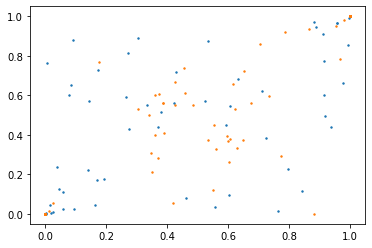

(None,
 ListWrapper([<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[-1.0606954, -1.3106296]], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-0.56037617]], dtype=float32)>]),
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([3.0436559 , 0.96447146, 0.00946647, 0.70472133], dtype=float32)>)

In [13]:
model.visualize(), model.df_input, model.encoder.df